#### Aquí encontrarás todo lo que necesitas saber: https://www.kaggle.com/competitions/desafio-de-prediccion-de-precios-de-portatiles

## Librerias

In [1]:
# Para tratamiento de datos
import pandas as pd
import seaborn as sns
import numpy as np
import re

# Para Gráficos
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Modelado
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from statsmodels import stats
from statsmodels.stats.anova import anova_lm
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Herramientas
from Toolbox_ML import *

import warnings
warnings.filterwarnings('ignore')

## Data

In [2]:
### Para que funcione necesitas bajarte los archivos de datos de Kaggle 
df = pd.read_csv('./data/train.csv')


## Data exploration

Explorar la base de datos de train

In [3]:
df.head()

,id,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,268,1002,Dell,Inspiron 5567,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,AMD Radeon R7 M445,Windows 10,2.36kg,749.00
1,347,867,Asus,X541NA (N4200/4GB/1TB/W10),Notebook,15.6,1366x768,Intel Pentium Quad Core N4200 1.1GHz,4GB,1TB HDD,Intel HD Graphics 505,Windows 10,2kg,449.00
2,353,966,Toshiba,Portege Z30-C-1CW,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 7,1.2kg,1460.00
3,578,767,Dell,Alienware 17,Gaming,15.6,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.42kg,2868.99
4,42,1241,Dell,Latitude E7270,Ultrabook,12.5,Full HD / Touchscreen 1920x1080,Intel Core i5 6300U 2.4GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 7,1.26kg,1713.37


In [4]:
describe_df(df)

,id,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
Tipos,int64,int64,object,object,object,float64,object,object,object,object,object,object,object,float64
% Faltante,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Valores Únicos,912,912,19,475,6,15,35,104,8,36,91,9,158,614
% Cardinalidad,100.0,100.0,2.08,52.08,0.66,1.64,3.84,11.4,0.88,3.95,9.98,0.99,17.32,67.32


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                912 non-null    int64  
 1   laptop_ID         912 non-null    int64  
 2   Company           912 non-null    object 
 3   Product           912 non-null    object 
 4   TypeName          912 non-null    object 
 5   Inches            912 non-null    float64
 6   ScreenResolution  912 non-null    object 
 7   Cpu               912 non-null    object 
 8   Ram               912 non-null    object 
 9   Memory            912 non-null    object 
 10  Gpu               912 non-null    object 
 11  OpSys             912 non-null    object 
 12  Weight            912 non-null    object 
 13  Price_euros       912 non-null    float64
dtypes: float64(2), int64(2), object(10)
memory usage: 99.9+ KB


In [6]:
df.columns

Index(['id', 'laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros'],
      dtype='object')

Información de las variables:   

**id**: Identificador único para cada entrada en el dataset.  
**laptop_ID**: Identificador específico para cada ordenador.   
**Company**: Marca   
**Product**: Nombre o modelo del producto específico.  
**TypeName**: Tipo de laptop (por ejemplo, Ultrabook, Gaming, Notebook).  
**Inches**: Tamaño de la pantalla de la laptop en pulgadas.  
**ScreenResolution**: Resolución de la pantalla (por ejemplo, 1920x1080).  
**Cpu**: Información sobre el procesador de la laptop (por ejemplo, Intel Core i7, AMD Ryzen 5).  
**Ram**: Cantidad de memoria RAM en la laptop (por ejemplo, 8GB, 16GB).  
**Memory**: Capacidad de almacenamiento interno de la laptop (por ejemplo, 256GB SSD, 1TB HDD).  
**Gpu**: Información sobre la tarjeta gráfica (por ejemplo, Nvidia GTX 1050, Intel UHD Graphics).  
**OpSys**: Sistema operativo instalado en la laptop (por ejemplo, Windows 10, macOS, Linux).  
**Weight**: Peso de la laptop (probablemente en kilogramos o gramos).  
**Price_euros**: Precio de la laptop en euros, que es la variable objetivo que quieres predecir  

In [7]:
df.describe()

,id,laptop_ID,Inches,Price_euros
count,912.000000,912.000000,912.000000,912.000000
mean,645.091009,666.192982,15.011404,1108.122873
std,380.313813,384.873846,1.411744,714.597741
min,0.000000,1.000000,10.100000,174.000000
25%,319.750000,330.500000,14.000000,589.000000
50%,636.500000,673.500000,15.600000,949.000000
75%,980.250000,998.500000,15.600000,1458.500000
max,1302.000000,1320.000000,18.400000,6099.000000


In [8]:
target = "Price_euros"

<Axes: xlabel='Price_euros', ylabel='Count'>

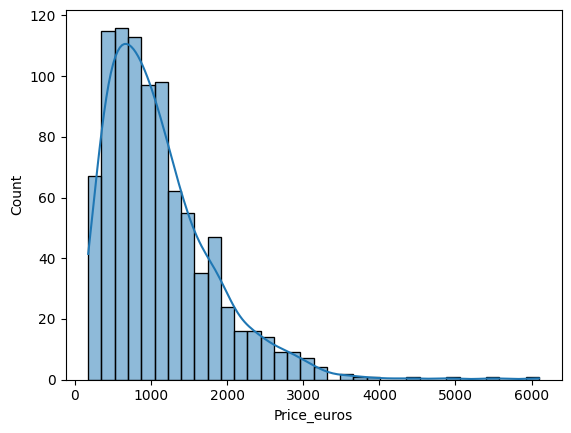

In [9]:
sns.histplot(x = target, data = df, kde = True)

In [10]:
value_counts_dict = {}

for col in df:
    value_counts_dict[col] = df[col].value_counts()

for col, counts in value_counts_dict.items():
    print(f"Value counts for column {col}:\n{counts}\n")

Value counts for column id:
id
268     1
67      1
39      1
703     1
568     1
       ..
53      1
981     1
1282    1
721     1
1179    1
Name: count, Length: 912, dtype: int64

Value counts for column laptop_ID:
laptop_ID
1002    1
945     1
374     1
158     1
960     1
       ..
691     1
632     1
1246    1
1240    1
1313    1
Name: count, Length: 912, dtype: int64

Value counts for column Company:
Company
Lenovo       208
Dell         207
HP           189
Asus         108
Acer          75
Toshiba       37
MSI           34
Apple         17
Mediacom       7
Razer          6
Samsung        6
Fujitsu        3
Microsoft      3
Vero           3
Xiaomi         3
Google         2
Chuwi          2
LG             1
Huawei         1
Name: count, dtype: int64

Value counts for column Product:
Product
Inspiron 3567                                21
XPS 13                                       20
250 G6                                       19
Vostro 3568                                  16


In [11]:
unique_values_dict = {}
for col in df:
    unique_values_dict[col] = df[col].unique()

for col, unique_values in unique_values_dict.items():
    print(f"Unique values for column {col}:\n{unique_values}\n")

Unique values for column id:
[ 268  347  353  578   42  867 1136  609  474  838  851  904  355   44
   36  971  938  718  518 1126   51  772 1001  330   66  829 1129 1197
  171  233  205  361 1250  707  884 1071   95  745  899  313 1063  193
  625  142  243 1214 1047  648   34  804  872 1297  192  451  894  961
 1168  966  794  763  946 1298  715  762 1101  994  528  926  791  351
  166 1196 1056  909 1189  654  968 1027  217 1224  559  136  420   54
  788  628 1215  396 1083   20 1263  258  159  572  374   25  345  827
  661  102  185   69  327  439  662  799  555   40 1110  998  500  734
  974  117  392 1060  613  711 1245  639    9 1213  535  155 1074  472
   47    5  466  712  212 1067  785  332 1199  412  200  509  411  627
 1088  881  914  690  111   26  375  289 1007  476  475  125 1154 1184
  322  280   63  547 1293  536  687 1023  210  657  671  194  672 1152
  201  792  306  828 1055  813 1000  110  399  636 1264  318  172  293
  138  747  801   45 1262  923  879  931  730   

In [12]:
train_set, test_set = train_test_split(df, test_size= 0.2, random_state= 42) 

In [13]:
X_train = train_set.drop(target, axis = 1) # Tengo que limpiar las categóricas en numéricas 
y_train = train_set[target]
X_test = test_set.drop(target, axis = 1) # Tengo que hacerle las mismas transformaciones que le haga a X_train
y_test = test_set[target]

In [14]:
X_train.shape

(729, 13)

In [15]:
y_train.shape

(729,)

In [16]:
X_test.shape

(183, 13)

In [17]:
y_test.shape

(183,)

## Limpieza (todos los valores han de ser numéricos)

In [18]:
#Pongo como índice el id:

X_train.set_index('id', inplace= True)
X_test.set_index('id', inplace= True) # lo mismo para test



In [19]:
#columns = ['id', 'laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
 #      'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
  #     'Price_euros'],

Limpieza de Company

In [20]:
# Crear el OneHotEncoder
one_hot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Ajustar el encoder a los datos de entrenamiento
one_hot_encoder.fit(X_train[['Company']])

# Transformar los datos de entrenamiento y prueba
X_train_encoded = one_hot_encoder.transform(X_train[['Company']])
X_test_encoded = one_hot_encoder.transform(X_test[['Company']])

# Convertir los arrays transformados a DataFrames para poder concatenarlos
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=one_hot_encoder.get_feature_names_out(['Company']))
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=one_hot_encoder.get_feature_names_out(['Company']))

# Concatenar las variables codificadas con el resto de las características
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
X_train = pd.concat([X_train.drop('Company', axis=1), X_train_encoded_df], axis=1)
X_test = pd.concat([X_test.drop('Company', axis=1), X_test_encoded_df], axis=1)


In [21]:
X_train.Company_Apple.dtype
#Ya son numéricas

dtype('float64')

Limpieza de Product 

In [22]:
X_train

,laptop_ID,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,...,Company_LG,Company_Lenovo,Company_MSI,Company_Mediacom,Company_Microsoft,Company_Razer,Company_Samsung,Company_Toshiba,Company_Vero,Company_Xiaomi
0,41,X540UA-DM186 (i3-6006U/4GB/1TB/FHD/Linux),Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4GB,1TB HDD,Intel HD Graphics 620,Linux,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,127,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,256GB SSD,AMD Radeon R5,Windows 10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1243,X540SA-RBPDN09 (N3710/4GB/1TB/W10),Notebook,15.6,1366x768,Intel Pentium Quad Core N3710 1.6GHz,4GB,1TB HDD,Intel HD Graphics 405,Windows 10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,105,Inspiron 3576,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,1TB HDD,AMD Radeon 520,Linux,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,578,14-am079na (N3710/8GB/2TB/W10),Notebook,14.0,1366x768,Intel Pentium Quad Core N3710 1.6GHz,8GB,2TB HDD,Intel HD Graphics 405,Windows 10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
724,267,ProBook 450,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,4GB,500GB HDD,Intel HD Graphics 620,Windows 10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
725,610,Laptop MSI,Gaming,17.3,Full HD 1920x1080,Intel Core i7 6820HK 2.7GHz,16GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 970M,Windows 10,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
726,1026,Elitebook 840,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4GB,256GB SSD,Intel HD Graphics 620,Windows 10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
727,363,Inspiron 7577,Gaming,15.6,Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8GB,1TB HDD,Nvidia GeForce GTX 1050,Windows 10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
# Función para simplificar nombres de productos
def procesar_columna(columna):
    if pd.notna(columna):
        lista_resultante = str(columna).split()
        if len(lista_resultante) >= 2:
            return f"{lista_resultante[0]} {lista_resultante[1]}"
        elif len(lista_resultante) == 1:
            return lista_resultante[0]
    return 'Unk'

# Aplicar la función a la columna 'Product'
def limpiar_product(df):
    df['Product'] = df['Product'].apply(procesar_columna)
    pattern = re.compile(r'\([^)]*\)?')
    df['Product'] = df['Product'].apply(lambda x: re.sub(pattern, '', x).strip() if '(' in x else x)
    return df

X_train = limpiar_product(X_train)
X_test = limpiar_product(X_test)

# OneHotEncoder para la columna 'Product'
one_hot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
product_encoded_train = one_hot_encoder.fit_transform(X_train[['Product']])
product_encoded_test = one_hot_encoder.transform(X_test[['Product']])

product_encoded_train_df = pd.DataFrame(product_encoded_train, columns=one_hot_encoder.get_feature_names_out(['Product']))
product_encoded_test_df = pd.DataFrame(product_encoded_test, columns=one_hot_encoder.get_feature_names_out(['Product']))

# Concatenar las columnas codificadas con los DataFrames originales
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
X_train = pd.concat([X_train.drop('Product', axis=1), product_encoded_train_df], axis=1)
X_test = pd.concat([X_test.drop('Product', axis=1), product_encoded_test_df], axis=1)




Limpieza de TypeName

In [24]:
# Crear el OneHotEncoder
one_hot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Ajustar el encoder a los datos de entrenamiento
one_hot_encoder.fit(X_train[['TypeName']])

# Transformar los datos de entrenamiento y prueba
X_train_encoded = one_hot_encoder.transform(X_train[['TypeName']])
X_test_encoded = one_hot_encoder.transform(X_test[['TypeName']])

# Convertir los arrays transformados a DataFrames para poder concatenarlos
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=one_hot_encoder.get_feature_names_out(['TypeName']))
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=one_hot_encoder.get_feature_names_out(['TypeName']))

# Concatenar las variables codificadas con el resto de las características
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
X_train = pd.concat([X_train.drop('TypeName', axis=1), X_train_encoded_df], axis=1)
X_test = pd.concat([X_test.drop('TypeName', axis=1), X_test_encoded_df], axis=1)

In [25]:
X_train.columns

Index(['laptop_ID', 'Inches', 'ScreenResolution', 'Cpu', 'Ram', 'Memory',
       'Gpu', 'OpSys', 'Weight', 'Company_Acer',
       ...
       'Product_Zenbook UX330UA-AH5Q', 'Product_Zenbook UX410UA-GV027T',
       'Product_Zenbook UX430UA', 'Product_Zenbook UX510UW-FI095T',
       'TypeName_2 in 1 Convertible', 'TypeName_Gaming', 'TypeName_Netbook',
       'TypeName_Notebook', 'TypeName_Ultrabook', 'TypeName_Workstation'],
      dtype='object', length=426)

Limpieza de Inches

In [26]:
X_train.Inches.dtype
X_test.Inches.dtype

# Ya son numéricas 

dtype('float64')

Limpieza de ScreenResolution

In [27]:
# Función para extraer información de la columna 'ScreenResolution'
def extraer_numeros_touch_calidad_ips(cadena):
    numeros = re.findall(r'\d+', cadena)
    touch = 'Touchscreen' in cadena
    calidad = re.search(r'(Full HD|Quad HD|4K Ultra HD|Retina Display)', cadena)
    calidad = calidad.group() if calidad else 'Standard'
    ips_panel = 'IPS Panel' in cadena
    return {'Ancho': int(numeros[0]), 'Alto': int(numeros[1]), 'Touchscreen': touch, 'Calidad': calidad, 'IPS': ips_panel}

# Aplicar la función y expandir los resultados en nuevas columnas
def limpiar_screen_resolution(df):
    df[['Ancho', 'Alto', 'Touchscreen', 'Calidad', 'IPS']] = df['ScreenResolution'].apply(extraer_numeros_touch_calidad_ips).apply(pd.Series)
    df['Touchscreen'] = df['Touchscreen'].astype(int)
    df['IPS'] = df['IPS'].astype(int)
    return df

X_train = limpiar_screen_resolution(X_train)
X_test = limpiar_screen_resolution(X_test)

# OneHotEncoder para la columna 'Calidad'
quality_encoded_train = one_hot_encoder.fit_transform(X_train[['Calidad']])
quality_encoded_test = one_hot_encoder.transform(X_test[['Calidad']])

quality_encoded_train_df = pd.DataFrame(quality_encoded_train, columns=one_hot_encoder.get_feature_names_out(['Calidad']))
quality_encoded_test_df = pd.DataFrame(quality_encoded_test, columns=one_hot_encoder.get_feature_names_out(['Calidad']))

# Concatenar las columnas codificadas con los DataFrames originales
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
X_train = pd.concat([X_train.drop('Calidad', axis=1), quality_encoded_train_df], axis=1)
X_test = pd.concat([X_test.drop('Calidad', axis=1), quality_encoded_test_df], axis=1)

# Rellenar los valores faltantes con ceros
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)

# Eliminar la columna original 'ScreenResolution'
X_train.drop(columns='ScreenResolution', inplace=True)
X_test.drop(columns='ScreenResolution', inplace=True)



Limpieza de Cpu

In [28]:
# Asegúrate de que la columna 'Cpu' es de tipo str
X_train['Cpu'] = X_train['Cpu'].astype(str)
X_test['Cpu'] = X_test['Cpu'].astype(str)

# Extraer la frecuencia del CPU y crear una nueva columna
X_train['Cpu_num'] = X_train['Cpu'].str.extract('(\d+(?:\.\d+)?)GHz').astype(float)
X_test['Cpu_num'] = X_test['Cpu'].str.extract('(\d+(?:\.\d+)?)GHz').astype(float)

# Eliminar el patrón de frecuencia de la columna original para mantener solo el resto del texto
X_train['Cpu'] = X_train['Cpu'].str.replace(r'(\d+(?:\.\d+)?)GHz', '', regex=True)
X_test['Cpu'] = X_test['Cpu'].str.replace(r'(\d+(?:\.\d+)?)GHz', '', regex=True)

In [29]:
X_train.Cpu_num.dtype

dtype('float64')

Limpieza de Ram

In [30]:
#Transformar en numérica el RAM
X_train['Ram'] = X_train['Ram'].str.replace('GB', '').astype(float)

X_test['Ram'] = X_test['Ram'].str.replace('GB', '').astype(float) # lo mismo para test


Limpieza de Memory

In [31]:
import re

# Función para limpiar y extraer información de la columna 'Memory'
def limpiar_memory(memory):
    try:
        memory = memory.replace('GB', '').replace('TB', '000').split()
        size = sum(int(re.sub(r'\D', '', x)) for x in memory if re.sub(r'\D', '', x).isdigit())
        ssd = 'SSD' in memory
        hdd = 'HDD' in memory
        hybrid = 'Hybrid' in memory
        flash = 'Flash' in memory
        return {'Memory_Size': size, 'SSD': int(ssd), 'HDD': int(hdd), 'Hybrid': int(hybrid), 'Flash_Storage': int(flash)}
    except:
        return {'Memory_Size': 0, 'SSD': 0, 'HDD': 0, 'Hybrid': 0, 'Flash_Storage': 0}

# Aplicar la limpieza a la columna 'Memory' y expandir los resultados en nuevas columnas
def procesar_memory(df):
    memory_features = df['Memory'].apply(limpiar_memory).apply(pd.Series)
    return pd.concat([df.drop(columns='Memory'), memory_features], axis=1)

# Aplicar las funciones de limpieza a los DataFrames de entrenamiento y prueba
X_train = procesar_memory(X_train)
X_test = procesar_memory(X_test)

# Mostrar los DataFrames limpios
print(X_train)
print(X_test)



     laptop_ID  Inches                             Cpu   Ram  \
0           41    15.6            Intel Core i3 6006U    4.0   
1          127    15.6             AMD A9-Series 9420    4.0   
2         1243    15.6  Intel Pentium Quad Core N3710    4.0   
3          105    15.6            Intel Core i5 8250U    8.0   
4          578    14.0  Intel Pentium Quad Core N3710    8.0   
..         ...     ...                             ...   ...   
724        267    15.6            Intel Core i5 8250U    4.0   
725        610    17.3           Intel Core i7 6820HK   16.0   
726       1026    14.0            Intel Core i5 7200U    4.0   
727        363    15.6           Intel Core i5 7300HQ    8.0   
728        169    15.6           Intel Core i7 7700HQ   16.0   

                         Gpu       OpSys  Weight  Company_Acer  Company_Apple  \
0      Intel HD Graphics 620       Linux     2kg           0.0            0.0   
1              AMD Radeon R5  Windows 10   2.1kg           1.0       

Limpieza de Gpu

In [32]:

# Función para limpiar y extraer información de la columna 'Gpu'
def limpiar_gpu(gpu):
    parts = gpu.split()
    manufacturer = parts[0] if parts[0] in ['Intel', 'AMD', 'NVIDIA'] else 'Other'
    model = ' '.join(parts[1:])
    return {'Gpu_Manufacturer': manufacturer, 'Gpu_Model': model}

# Aplicar la limpieza a la columna 'Gpu' y expandir los resultados en nuevas columnas
def procesar_gpu(df):
    gpu_features = df['Gpu'].apply(limpiar_gpu).apply(pd.Series)
    return pd.concat([df.drop(columns='Gpu'), gpu_features], axis=1)

# Aplicar las funciones de limpieza a los DataFrames de entrenamiento y prueba
X_train = procesar_gpu(X_train)
X_test = procesar_gpu(X_test)

# OneHotEncoder para la columna 'Gpu_Manufacturer'
one_hot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
gpu_manufacturer_encoded_train = one_hot_encoder.fit_transform(X_train[['Gpu_Manufacturer']])
gpu_manufacturer_encoded_test = one_hot_encoder.transform(X_test[['Gpu_Manufacturer']])

gpu_manufacturer_encoded_train_df = pd.DataFrame(gpu_manufacturer_encoded_train, columns=one_hot_encoder.get_feature_names_out(['Gpu_Manufacturer']))
gpu_manufacturer_encoded_test_df = pd.DataFrame(gpu_manufacturer_encoded_test, columns=one_hot_encoder.get_feature_names_out(['Gpu_Manufacturer']))

# Concatenar las columnas codificadas con los DataFrames originales
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
X_train = pd.concat([X_train.drop('Gpu_Manufacturer', axis=1), gpu_manufacturer_encoded_train_df], axis=1)
X_test = pd.concat([X_test.drop('Gpu_Manufacturer', axis=1), gpu_manufacturer_encoded_test_df], axis=1)



Limpieza de OpSys

In [33]:
# Crear el OneHotEncoder
one_hot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Ajustar el encoder a los datos de entrenamiento
one_hot_encoder.fit(X_train[['OpSys']])

# Transformar los datos de entrenamiento y prueba
X_train_encoded = one_hot_encoder.transform(X_train[['OpSys']])
X_test_encoded = one_hot_encoder.transform(X_test[['OpSys']])

# Convertir los arrays transformados a DataFrames para poder concatenarlos
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=one_hot_encoder.get_feature_names_out(['OpSys']))
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=one_hot_encoder.get_feature_names_out(['OpSys']))

# Concatenar las variables codificadas con el resto de las características
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
X_train = pd.concat([X_train.drop('OpSys', axis=1), X_train_encoded_df], axis=1)
X_test = pd.concat([X_test.drop('OpSys', axis=1), X_test_encoded_df], axis=1)

Limpieza de Weight

In [34]:
#Transformar en numérica weight
X_train['Weight'] = X_train['Weight'].str.replace('kg', '').astype(float)

X_test['Weight'] = X_test['Weight'].str.replace('kg', '').astype(float) # lo mismo para test

Comprobar que todas las columnas han pasado a ser numéricas

In [35]:
# Verificar que no queden columnas de tipo 'object' en X_train y X_test
categorical_columns_train = X_train.select_dtypes(include=['object', 'category']).columns
categorical_columns_test = X_test.select_dtypes(include=['object', 'category']).columns

if len(categorical_columns_train) == 0 and len(categorical_columns_test) == 0:
    print("Todas las columnas son numéricas en ambos conjuntos de datos.")
else:
    print("Aún hay columnas no numéricas en los conjuntos de datos.")
    if len(categorical_columns_train) > 0:
        print(f"Columnas no numéricas en X_train: {categorical_columns_train}")
    if len(categorical_columns_test) > 0:
        print(f"Columnas no numéricas en X_test: {categorical_columns_test}")


Aún hay columnas no numéricas en los conjuntos de datos.
Columnas no numéricas en X_train: Index(['Cpu', 'Gpu_Model'], dtype='object')
Columnas no numéricas en X_test: Index(['Cpu', 'Gpu_Model'], dtype='object')


In [36]:
from sklearn.preprocessing import OneHotEncoder

# Crear el OneHotEncoder
one_hot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Codificar la columna 'Cpu' en X_train y X_test
cpu_encoded_train = one_hot_encoder.fit_transform(X_train[['Cpu']])
cpu_encoded_test = one_hot_encoder.transform(X_test[['Cpu']])

# Convertir los resultados codificados en DataFrames
cpu_encoded_train_df = pd.DataFrame(cpu_encoded_train, columns=one_hot_encoder.get_feature_names_out(['Cpu']))
cpu_encoded_test_df = pd.DataFrame(cpu_encoded_test, columns=one_hot_encoder.get_feature_names_out(['Cpu']))

# Concatenar las columnas codificadas con los DataFrames originales
X_train = pd.concat([X_train.drop('Cpu', axis=1).reset_index(drop=True), cpu_encoded_train_df], axis=1)
X_test = pd.concat([X_test.drop('Cpu', axis=1).reset_index(drop=True), cpu_encoded_test_df], axis=1)

# Codificar la columna 'Gpu_Model' en X_train y X_test
gpu_model_encoded_train = one_hot_encoder.fit_transform(X_train[['Gpu_Model']])
gpu_model_encoded_test = one_hot_encoder.transform(X_test[['Gpu_Model']])

# Convertir los resultados codificados en DataFrames
gpu_model_encoded_train_df = pd.DataFrame(gpu_model_encoded_train, columns=one_hot_encoder.get_feature_names_out(['Gpu_Model']))
gpu_model_encoded_test_df = pd.DataFrame(gpu_model_encoded_test, columns=one_hot_encoder.get_feature_names_out(['Gpu_Model']))

# Concatenar las columnas codificadas con los DataFrames originales
X_train = pd.concat([X_train.drop('Gpu_Model', axis=1).reset_index(drop=True), gpu_model_encoded_train_df], axis=1)
X_test = pd.concat([X_test.drop('Gpu_Model', axis=1).reset_index(drop=True), gpu_model_encoded_test_df], axis=1)

# Verificar que todas las columnas sean numéricas ahora
categorical_columns_train = X_train.select_dtypes(include=['object', 'category']).columns
categorical_columns_test = X_test.select_dtypes(include=['object', 'category']).columns

if len(categorical_columns_train) == 0 and len(categorical_columns_test) == 0:
    print("Todas las columnas son numéricas en ambos conjuntos de datos.")
else:
    print("Aún hay columnas no numéricas en los conjuntos de datos.")
    if len(categorical_columns_train) > 0:
        print(f"Columnas no numéricas en X_train: {categorical_columns_train}")
    if len(categorical_columns_test) > 0:
        print(f"Columnas no numéricas en X_test: {categorical_columns_test}")


Todas las columnas son numéricas en ambos conjuntos de datos.


In [37]:
X_train.shape

(729, 603)

-----------------------------------------------------------------------------------------------------------------

## Análisis

In [38]:
# Correlación entre columnas numéricas

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)



corr_matrix = X_train.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(10)

,variable_1,variable_2,r,abs_r
275611,Cpu_AMD A9-Series A9-9420,Product_15-cd005nv,1.0,1.0
361902,Gpu_Model_Radeon RX 560,Product_FX550IK-DM018T,1.0,1.0
288329,Cpu_Intel Core M 6Y75,Product_Elitebook Folio,1.0,1.0
277138,Cpu_AMD E-Series 7110,Product_VivoBook X540YA-XX519T,1.0,1.0
280680,Cpu_Intel Atom Z8350,Product_Smartbook 142,1.0,1.0
90441,Product_IdeaPad 500-15ISK,Gpu_Model_Radeon R7 M360,1.0,1.0
201375,Product_Thinkpad P71,Gpu_Model_Quadro M620M,1.0,1.0
191122,Product_ThinkPad P40,Gpu_Model_Quadro M500M,1.0,1.0
346438,Gpu_Model_Quadro M500M,Product_ThinkPad P40,1.0,1.0
144692,Product_Precision 3520,Gpu_Model_Quadro M620,1.0,1.0


-----------------------------------------------------------------------------------------------------------------

### Crear y entrenar el modelo


In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

# Crear el modelo basado en árboles
modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Ajustar el modelo a los datos de entrenamiento
modelo_rf.fit(X_train, y_train)

# Crear el selector de características
selector_modelo = SelectFromModel(modelo_rf, prefit=True)

# Transformar los datos de entrenamiento y prueba
X_train_modelo_reducido = selector_modelo.transform(X_train)
X_test_modelo_reducido = selector_modelo.transform(X_test)

print(X_train_modelo_reducido.shape)
print(X_test_modelo_reducido.shape)


(729, 39)
(183, 39)


### 4. Sacar métricas, valorar el modelo 

Recuerda que en la competición se va a evaluar con la métrica de MAE.

In [44]:
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression

# Inicializar y ajustar un modelo de regresión lineal
modelo_regresion = LinearRegression()
modelo_regresion.fit(X_train_modelo_reducido, y_train)

# Predecir los valores para los datos de prueba
predicciones = modelo_regresion.predict(X_test_modelo_reducido)

# Calcular el Error Absoluto Medio (MAE)
mae = mean_absolute_error(y_test, predicciones)
print("MAE:", mae)


MAE: 214.73918653475184


In [45]:
from sklearn.ensemble import RandomForestRegressor

# Inicializar y ajustar un modelo de Random Forest
modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42)
modelo_rf.fit(X_train_modelo_reducido, y_train)

# Predecir los valores para los datos de prueba
predicciones_rf = modelo_rf.predict(X_test_modelo_reducido)

# Calcular el Error Absoluto Medio (MAE) para el modelo de Random Forest
mae_rf = mean_absolute_error(y_test, predicciones_rf)
print("MAE para Random Forest:", mae_rf)


MAE para Random Forest: 190.80005409836065


-----------------------------------------------------------------

## Una vez listo el modelo, toca predecir con el dataset de predicción 

Definición de **modelo que está listo**. 

Tras hacer suficientes pruebas, analizar los datos, hacer feature engineering, probar diferentes modelos con diferentes parámetros, es con este con el que observo mejores métricas y menos overfitting. ¡Cuidado con el overfitting aquí! Si vuestro modelo aprende muy bien de estos datos pero hay overfitting cuando le pasemos los datos desconocidos de `test.csv` nos arriesgamos a que digamos, no salga lo esperado.

### 1. Entrena dicho modelo con TODOS tus datos de train, esto es con `train.csv` al completo.


**CON LAS TRANSFORMACIONES QUE LE HAYAS REALIZADO A `X` INCLUÍDAS.**


Véase:
- Estandarización/Normalización
- Eliminación de Outliers
- Eliminación de columnas
- Creación de columnas nuevas
- Gestión de valores nulos
- Y un largo etcétera de técnicas que como Data Scientist hayas considerado las mejores para tu dataset.

### 2. Carga los datos de `test.csv` para predecir.

**¿Por qué puede dar error?** 

IMPORTANTE: APLICAR A ESTOS DATOS LO MISMO QUE HAYÁIS APLICADO A LOS DATOS DE ENTRENAMIENTO

- SI EL ARRAY CON EL QUE HICISTEIS `.fit()` ERA DE 4 COLUMNAS, PARA `.predict()` DEBEN SER LAS MISMAS
- SI AL ARRAY CON EL QUE HICISTEIS `.fit()` LO NORMALIZASTEIS, PARA `.predict()` DEBÉIS NORMALIZARLO
- TODO IGUAL SALVO BORRAR FILAS, EL NÚMERO DE ROWS SE DEBE MANTENER EN ESTE SET, PUES LA PREDICCIÓN DEBE TENER 391 FILAS, SI O SI

**Entonces, si al cargar los datos de train usé `index_col=0` para que utilizara la primera columna del conjunto de datos como índice, ¿tendré que hacerlo también para el conjunto `test.csv`?**

In [40]:
# ¿Qué opináis?
# Sí

![](https://www.tierraljelechu.com/web/img/wiki_up/1.996-SorpresaDto.-1-Red.jpg)

### 3. AHORA puedo hacer la predicción que será lo que subirás a Kaggle. 

**¿Qué es lo que subirás a Kaggle?**

In [41]:
predictions = model.predict(X_pred)
predictions

NameError: name 'model' is not defined

**¡PERO! Para subir a Kaggle la predicción, ésta tendrá que tener una forma específica y no valdrá otra.**

En este caso, la **MISMA** forma que `sample_submission.csv`. 

In [ ]:
sample = pd.read_csv("Dataset/sample_submission.csv") # Esta es mi ruta del archivo, la vuestra puede ser otra

In [ ]:
sample.head()

In [ ]:
sample.shape

### 4. Mete tus predicciones en un dataframe. 

En este caso, la **MISMA** forma que `sample_submission.csv`. 

### 5. Pásale el CHEQUEATOR para comprobar que efectivamente está listo para subir a Kaggle.

In [ ]:
def chequeator(df_to_submit):
    """
    Esta función se asegura de que tu submission tenga la forma requerida por Kaggle.
    
    Si es así, se guardará el dataframe en un `csv` y estará listo para subir a Kaggle.
    
    Si no, LEE EL MENSAJE Y HAZLE CASO.
    
    Si aún no:
    - apaga tu ordenador, 
    - date una vuelta, 
    - enciendelo otra vez, 
    - abre este notebook y 
    - leelo todo de nuevo. 
    Todos nos merecemos una segunda oportunidad. También tú.
    """
    if df_to_submit.shape == sample.shape:
        if df_to_submit.columns.all() == sample.columns.all():
            if df_to_submit.id.all() == sample.id.all():
                print("You're ready to submit!")
                submission.to_csv("submission.csv", index = False) #muy importante el index = False
                urllib.request.urlretrieve("https://i.kym-cdn.com/photos/images/facebook/000/747/556/27a.jpg", "gfg.png")     
                img = Image.open("gfg.png")
                img.show()   
            else:
                print("Check the ids and try again")
        else:
            print("Check the names of the columns and try again")
    else:
        print("Check the number of rows and/or columns and try again")
        print("")


In [ ]:
chequeator(submission) # submission es el nombre que le habríamos puesto a nuestro .csv con los valores que me salieron en la predicción

You're ready to submit!
